In [30]:
from dict_net import *
from deepDream import *

In [31]:
root = '/var/tmp/on63ilaw/mjsynth'
img_folder = 'raw'

In [51]:
ds = dg.mjsynth.MjSynthWS(root)

In [52]:
transform1 = dg.mjsynth.mjsynth_gray_pad
transform2 = transforms.Compose([transforms.Grayscale(),transforms.ToTensor(),transforms.Normalize((0.47,), (0.14,))])


In [53]:
mean_list1 = []
std_list1 = []

mean_list2 = []
std_list2 = []

In [54]:
for i in range(len(ds)): 
    img_path = os.path.join(root,img_folder,ds.filenames[i])
    try:
        image = Image.open(img_path)
    except:
        image = Image.fromarray((np.random.random([400,400,3])*255).astype("uint8"))
        print("Failed to convert ", img_path)
        
    image_tensor1 = transform1(image)
    image_tensor2 = transform2(image)
    
    mean_list1.append(torch.flatten(image_tensor1).mean())
    std_list1.append(torch.flatten(image_tensor1).std())
    
    mean_list2.append(torch.flatten(image_tensor2).mean())   
    std_list2.append(torch.flatten(image_tensor2).std())

Failed to convert  /var/tmp/on63ilaw/mjsynth/raw/363_actuating_904.jpg


In [55]:
mean_method1 = sum(mean_list1)/len(mean_list1)
std_method1 = sum(std_list1)/len(std_list1) 

mean_method2 = sum(mean_list2)/len(mean_list2)
std_method2 = sum(std_list2)/len(std_list2) 

In [56]:
print(mean_method1)
print(std_method1)

tensor(-3.8887e-05)
tensor(1.0000)


In [57]:
print(mean_method2)
print(std_method2)

tensor(-0.0360)
tensor(1.0203)


In [58]:
from matplotlib import pyplot as plt

(array([1.0000e+00, 3.0000e+00, 0.0000e+00, 5.0000e+00, 1.6000e+01,
        6.5560e+03, 5.5928e+04, 1.0430e+03, 5.0000e+00, 5.0000e+00]),
 array([-0.1746161 , -0.14718138, -0.11974667, -0.09231196, -0.06487724,
        -0.03744252, -0.01000781,  0.01742691,  0.04486162,  0.07229634,
         0.09973105], dtype=float32),
 <a list of 10 Patch objects>)

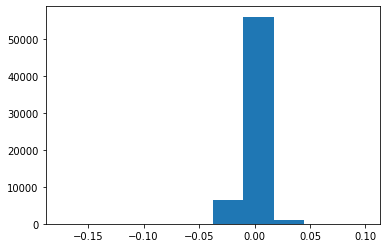

In [59]:
plt.hist(mean_list1,bins=10)

(array([ 2169.,  5593.,  8016.,  9821., 10684.,  9430.,  7543.,  5558.,
         3661.,  1087.]),
 array([-3.3001277 , -2.5995083 , -1.8988888 , -1.1982694 , -0.4976499 ,
         0.20296955,  0.903589  ,  1.6042085 ,  2.304828  ,  3.0054474 ,
         3.7060668 ], dtype=float32),
 <a list of 10 Patch objects>)

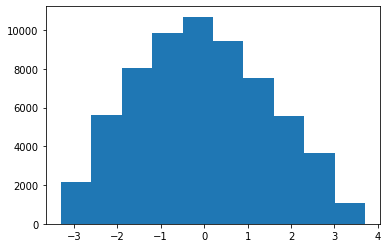

In [60]:
plt.hist(mean_list2,bins=10)

(array([3.0000e+00, 2.7000e+01, 6.3519e+04, 1.0000e+01, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.8856334 , 0.9321044 , 0.97857535, 1.0250463 , 1.0715173 ,
        1.1179883 , 1.1644593 , 1.2109302 , 1.2574012 , 1.3038722 ,
        1.3503432 ], dtype=float32),
 <a list of 10 Patch objects>)

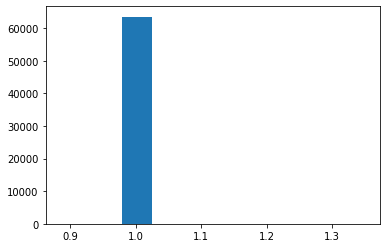

In [61]:
plt.hist(std_list1,bins=10)

(array([ 7246., 15519., 14324., 10725.,  7391.,  4388.,  2345.,  1098.,
          450.,    76.]),
 array([0.06620359, 0.39242303, 0.7186425 , 1.0448619 , 1.3710814 ,
        1.6973008 , 2.0235202 , 2.3497396 , 2.675959  , 3.0021787 ,
        3.328398  ], dtype=float32),
 <a list of 10 Patch objects>)

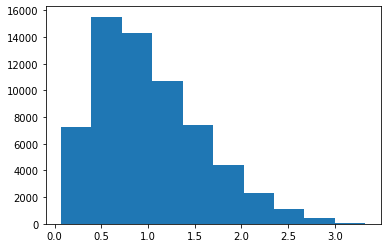

In [62]:
plt.hist(std_list2,bins=10)

In [63]:
im_sample = Image.open(os.path.join(root,img_folder,ds.filenames[0]))
im_sample.show()

In [67]:
im_sample1,target = ds[0]
im_sample1 = torch.squeeze(im_sample1)
im_sample1 = im_sample1 * 0.14 + 0.47
im_sample1 = Image.fromarray((im_sample1.numpy()*255).astype('uint8'),'L')
im_sample1.show()

In [66]:
im_sample2 = Image.open(os.path.join(root,img_folder,ds.filenames[0]))
im_sample2 = transform2(im_sample2)
# im_sample2.shape
im_sample2 = torch.squeeze(im_sample2)
im_sample2 = im_sample2 * 0.14 + 0.47
im_sample2 = Image.fromarray((im_sample2.numpy()*255).astype('uint8'),'L')
im_sample2.show()